## SCALING AND NORMALIZATION OF DATA

### IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,skew
import seaborn as sns
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn = ignore_warn #ignore warning (from sklearn and seaborn)


In [3]:
sk = pd.DataFrame({'Age': [10, 9, 6, 39, 15,20], 'Salary':[10000,20000,5000,4500,2500,3000]})
sk

,Age,Salary
0,10,10000
1,9,20000
2,6,5000
3,39,4500
4,15,2500
5,20,3000


In [4]:
sk['Scaled_Age'] = ((sk.Age - sk.Age.min())/(sk.Age.max()-sk.Age.min()))
sk['Scaled_Salary'] = ((sk.Salary - sk.Salary.min())/(sk.Salary.max()-sk.Salary.min()))

In [5]:
sk

,Age,Salary,Scaled_Age,Scaled_Salary
0,10,10000,0.121212,0.428571
1,9,20000,0.090909,1.000000
2,6,5000,0.000000,0.142857
3,39,4500,1.000000,0.114286
4,15,2500,0.272727,0.000000
5,20,3000,0.424242,0.028571


In [6]:
sk.describe()

,Age,Salary,Scaled_Age,Scaled_Salary
count,6.000000,6.000000,6.000000,6.000000
mean,16.500000,7500.000000,0.318182,0.285714
std,12.078907,6678.323143,0.366027,0.381618
min,6.000000,2500.000000,0.000000,0.000000
25%,9.250000,3375.000000,0.098485,0.050000
50%,12.500000,4750.000000,0.196970,0.128571
75%,18.750000,8750.000000,0.386364,0.357143
max,39.000000,20000.000000,1.000000,1.000000


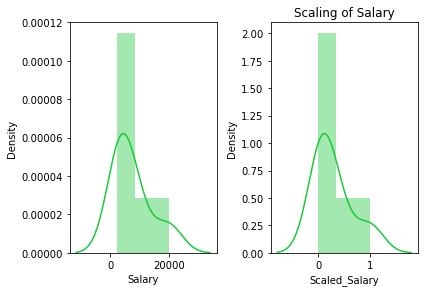

In [7]:
#Create a subplot 
fig, ax = plt.subplots(1,2)
color = sns.color_palette('bright')[2]

#Plot the normal Product_Supermarket_Sale on the first axis
sns.distplot(sk['Salary'],color = color, bins = 3, ax=ax[0])

#Transform the Product_Supermarket Sales column and plot on the second axis
sns.distplot(sk['Scaled_Salary'], color = color, bins = 3, ax = ax[1])

plt.tight_layout()
plt.title("Scaling of Salary", loc ='center');

 Scaling and normalization are often used interchangeably. And to make matters more interesting, scaling and normalization are very similar.

#### Similarities

in both scaling and transformation the values of the numeric variables so that the transformed data points have specific helpful properties. These properties can be exploited to create better features and models.

#### Differences:

In scaling, we're changing the **range** of the distribution of the data.... while in normalizing, we're changing the **shape** of the distribution of the data.

Range is the difference between the smallest and largest element in a distribution.

Scaling and normalization are so similar that they're often applies interchangeably, but as we've seen from the definitions, they have different effects on the data. As data professionals, we need to understand these differences and more importantly, know when to apply one rather than the other.


###  Why do we scale Data?
Remember that in scaling, we're transforming the data so that it fits within a specific scale, like 0-100 or 0-1. Usually 0-1. You want to scale data especially when you're using methods based on measures of how far apart data points are.

we may need to scale data for machine learning problems so that all variables have quite similar distribution range to avoid such issues

By scaling you can help compare different variables on equal footing.


### Some Common Types of Scaling:

1. **Simple Feature Scaling:**
This method simply divides each value by the maximum value for that feature... The resultant values are in the range between zero (0) and one (1)
Simple-feature scaling is the defacto scaling method used in image-data. When we scale images by dividing each image by  225 (maximum image pixel intensity)

Let's define a simple-feature scaling function..

In [56]:
def simple_feature_scaling(arr):
    """This method applies simple-feature scaling to a distribution (arr)
    @param arr: An array or list or series object
    @return: The arr with all features simply scaled"""
    
    arr_max = max(arr)
    new_arr = [i/arr_max for i in arr]
    return new_arr


#Lets define an array arr
 
arr = list(range(1,50,2))
arr_scaled = simple_feature_scaling(arr)
print(f'Before Scaling....\n min_arr is {min(arr)}\n max_arr is {max(arr)}\n')
print('After Scaling...\n min_arr_scaled is {} \n max_arr_scaled is {}'.format(min(arr_scaled),max(arr_scaled)))
    
    

Before Scaling....
 min_arr is 1
 max_arr is 49

After Scaling...
 min_arr_scaled is 0.02040816326530612 
 max_arr_scaled is 1.0


We can see the above distribution with range[1, 10] was scaled via simple-feature scaling to the range[0.1,1] quite easily.

2. **Min-Max Scaling:**
this is more popular than simple-feature scaling. This scaler takes each value and subtracts the minimum and then divides by the range(max-min). The resultant values range between zero(0) and one(1).

Lets define a min-max function


In [74]:
def min_max_scaling(arr):
    """This method applies min-max-scaling to a distribution(arr)
    
    @param arr: An array or list or series object
    @return: The arr with all features min-max scaled"""
    
    arr_max = max(arr)
    arr_min = min(arr)
    range_ = (arr_max - arr_min)
    
    new_arr = [(i-arr_max)/range_ for i in arr]
    
    return new_arr

#Let's define an arr and call the min-max scaler

arr = list(range(1,20))
arr_scaled = min_max_scaling(arr)

print('Before scaling\n max_arr is {}\n min_arr is {}'.format(max(arr),min(arr)))
print('After scaling\n max_scaled_arr is {}\n min_scaled_arr is {}'.format(max(arr_scaled),min(arr_scaled)))


Before scaling
 max_arr is 19
 min_arr is 1
After scaling
 max_scaled_arr is 0.0
 min_scaled_arr is -1.0


Just like before, min-max scaling takes a distribution with range[1,10] and scales it to the range [0.0,-1]

### VISUALIZATION OF THE ORIGINAL AND SCALED DATA

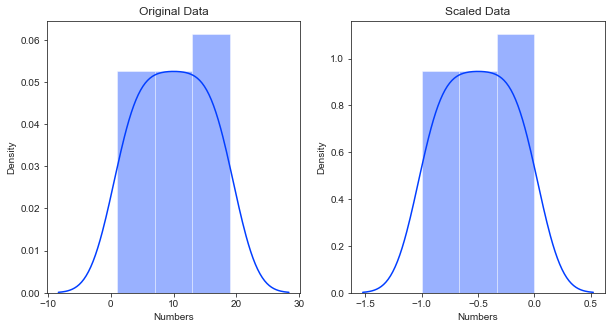

In [81]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
color = sns.color_palette('bright')[0]
sns.set_style('ticks')
sns.distplot(arr, ax=ax[0],color = color)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Numbers')
sns.distplot(arr_scaled, ax=ax[1],color = color)
ax[1].set_title('Scaled Data')
ax[1].set_xlabel('Numbers')
plt.show()

After Scaling we can see from the graph above that the original dataset had a minimum of 1 and a maximum of 19 and a maximum of 75. And, the scaled dataset has a maximum of [1.0]

The only thing that changes, when  we scale the data is the range of the distribution....The shape and other properties remain the same.

### Why Do we Normalize Data?
Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.


**Normal Distribution:** AKA,'bell curve' is a specific statistical distribution where roughly equal observations fall above and below the mean, the mean and the median are about the same, and there are more observations closer to the mean. The normal distribution is also known as *Guassian Distribution*.

In general, you'll normalize your data if you are going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Guassian naive Bayes.

**(NB: any method with 'Guassian' in the name probably assumes normality.)**

Note that Normalization is also referred to as Standardization in some statistical journals. Standardization aims to normalize the distribution by considering how far away each observation is from the mean in terms of the standard deviation. An example is the **Z-score**.

### Some Common Types of Normalization:

### **Z-Score or Standard Score**:
For each value in the distribution, we subtract the average or mean... and then divide by the standard deviation. This gives range from about minus 3 to 3, could be more,or less.

We can easily code it up, let's define a Z-score method..

In [83]:
def z_score_norm(arr):
    """Apply z-score normalization to an array or series"""
    
    mean = np.mean(arr)
    std_ = np.std(arr)
    
    new_arr= [(i-mean)/std_ for i in arr]
    
    return new_arr

arr = list(range(1,200,3))
norm_arr = z_score_norm(arr)

print('Before Normalization \n max_arr is {} \n min_arr is {}'.format(max(arr),min(arr)))
print('After Normalization \n max_norm_arr is {} \n min_norm_arr is {}'.format(max(norm_arr),min(norm_arr)))

Before Normalization 
 max_arr is 199 
 min_arr is 1
After Normalization 
 max_norm_arr is 1.7063893769835632 
 min_norm_arr is -1.7063893769835632


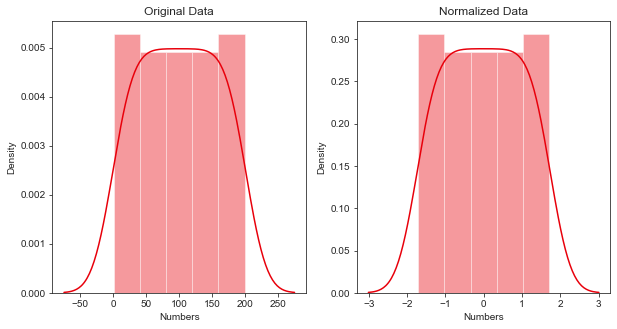

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
color = sns.color_palette('bright')[3]
sns.set_style('ticks')
sns.distplot(arr, ax=ax[0],color = color)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Numbers')
sns.distplot(norm_arr, ax=ax[1],color = color)
ax[1].set_title('Normalized Data')
ax[1].set_xlabel('Numbers')
plt.show()

### Box-Cox Normalization:

A Box-Cox transformation is a transformation of a non-normal dependent variable into a normal shape. The Box-Cox transformation is named after statisticians **George Box** and **Sir David Roxbee Cox** Who collaborated on a 1964 paper and developed the technique.

### How it works...
At the heart of the box-cox normalization is an exponent lambda, which varies from -5 to 5. all values of lambda are considered and the optimal value for your data is selected; The "optimal value" is the one which results in the best approximation of a normal distribution curve.
This process is akin to learning-rate alpha, in order to produce a finer fit to the data

Box-Cox by default works for only positives values, but there's a variant that can approximate negatives values too. 


### Apply Normalization to a Distribution:
Lets use the fifa21 players dataset. This time, we would apply box cox transformation to the Age column. We'd use the boxcox() function from scipy.stats.

In [91]:
from scipy import stats

#Let's import our data
fifa21 = pd.read_csv('players_21.csv')
fifa21

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [111]:
#Let's normalize the data
original_data = fifa21.age
normalized_data = stats.boxcox(original_data)
normalized_data



(array([2.82039005, 2.85790438, 2.69031039, ..., 2.48944993, 2.58395056,
        2.71413269]),
 -0.1276571133610594)

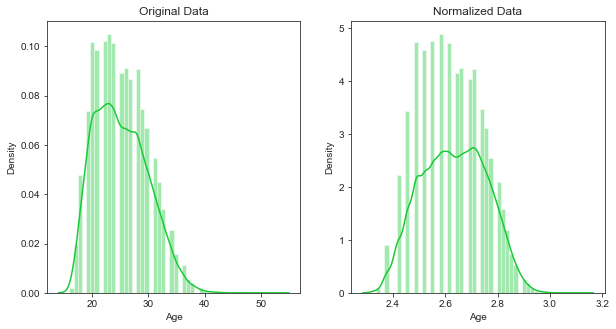

In [112]:
#Let's plot both together to compare
fig,ax = plt.subplots(1,2,figsize=(10,5))
color = sns.color_palette('bright')[2]
sns.set_style('ticks')
sns.distplot(original_data, ax=ax[0],color = color)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Age')
sns.distplot(normalized_data[0], ax=ax[1],color = color)
ax[1].set_title('Normalized Data')
ax[1].set_xlabel('Age')
plt.show()

So we use the stats.boxcox() function, which returns a tuple with the normalized series as the first element. The original dataset minimum is 15 and the maximum is 40. While the normalized dataset minumum is 2.0 and maximum is 3.0

Notice that in addition to changing the range of the Age distribution, the normalization method radically transforms the shape of the distribution to a roughly bell-shaped curve.